In [ ]:
#Exploratory Data Analysis using the Titanic dataset (available from Kaggle and Seaborn library)

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#Load the data
titanic = sns.load_dataset('titanic')
#Print the first 10 rows of data
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

In [3]:
#Count the number of rows and columns in the data set 
titanic.shape

(891, 15)

In [4]:
#for the numerical features we can visualise the mean, standard deviation and percentiles
titanic.describe()


survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [5]:
#Get a count of the number of survivors to see how many samples represent
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

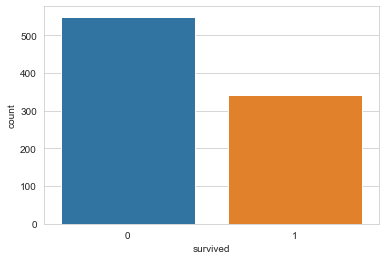

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=titanic)

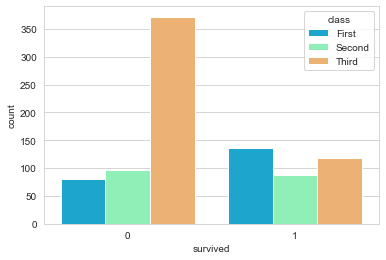

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='class',data=titanic,palette='rainbow')

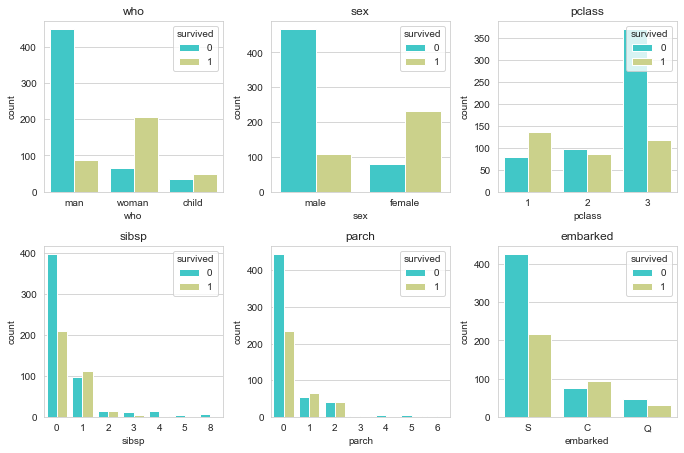

In [9]:
# Visualize the count of survivors for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c #index to go through the number of columns       
        ax = axs[r][c] #Show where to position each subplot
        
        sns.countplot(titanic[cols[i]], hue=titanic["survived"],palette='rainbow', ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
        
plt.tight_layout()   #tight_layout

In [10]:
#Look at survival rate by sex
titanic.groupby('who')[['survived']].mean()

survived
who            
child  0.590361
man    0.163873
woman  0.756458

In [11]:
#Look at survival rate by sex and class
titanic.pivot_table('survived', index='who', columns='class')

class     First    Second     Third
who                                
child  0.833333  1.000000  0.431034
man    0.352941  0.080808  0.119122
woman  0.978022  0.909091  0.491228

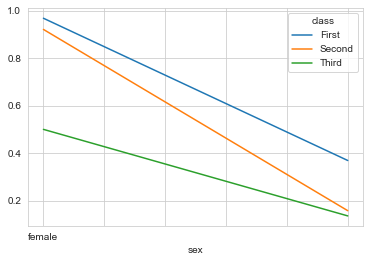

In [13]:
#Look at survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

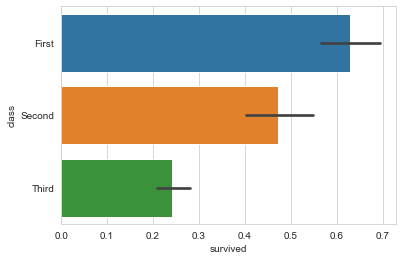

In [14]:
#Plot the survival rate of each class.
sns.barplot(x='survived', y='class', data=titanic)

In [15]:
#Look at survival rate by sex, age and class
age = pd.cut(titanic['age'], [0, 18, 80])

titanic.pivot_table('survived', ['sex',age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

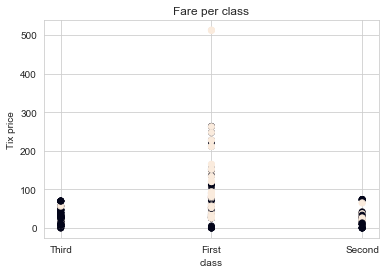

In [16]:
#visualise survival rate by ticket fare and class
plt.scatter(titanic['class'],titanic['fare'], c=titanic['survived'], label='fare')
plt.xlabel('class')
plt.ylabel('Tix price')
plt.title('Fare per class')
plt.show()

In [17]:
#Count the empty (NaN, NAN, na) values in each column 
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
class_l          0
dtype: int64

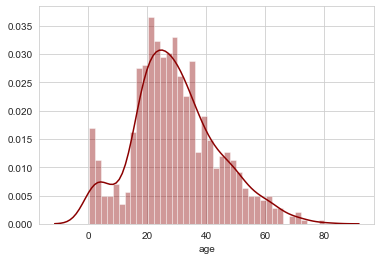

In [18]:
#see the distribution of the features. This can help deciding what kind of normalisation to use
sns.distplot(titanic['age'].dropna(),kde=True,color='darkred',bins=40)

In [19]:
#Visualise missing value in seaborn with heatmap
titanic.isnull()

survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  class_l  
0    False       False   True        False  False  False    False  
1    False       False  False        False  False  False    False  
2    False       False   True        False  False  False    False  
3    False       False  False        False  False  False    False  
4    False       False   True        False  False  False    False  
..     ...         ...    ...          ...    ...    ...      ...  
886  False       False   True        False  False  False    False  
887  False       False  False        False  False  False    False  
888  False       False   True        False  False  False    False  
889  False       False  False        False  False  False    False  
890  False       False   True        False  False  False    False  

[891 rows x 16 columns]

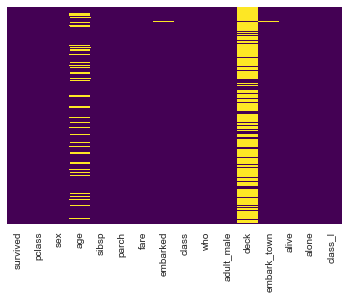

In [20]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')


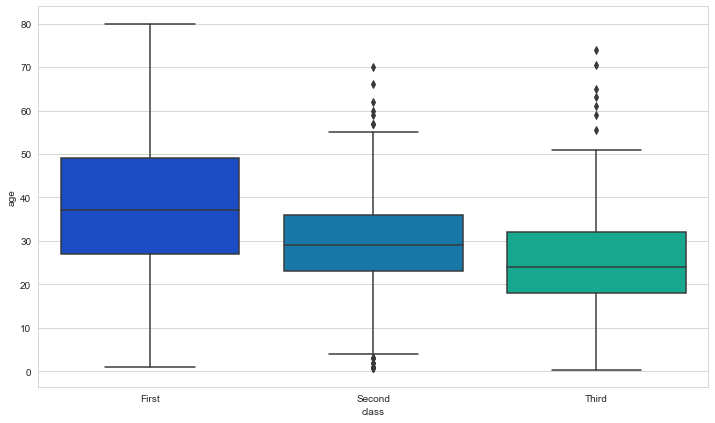

In [21]:
#seems like we have too much missing data from 'deck', we may substitute it with "known / not known" or just drop the column. We can fill the missing values in the 'Age' feature using the average. 
# A more sofisticated method would be replacing the missing values with the age average per another group, like 'class' 
plt.figure(figsize=(12, 7))
sns.boxplot(x='class',y='age',data=titanic,palette='winter')

In [24]:
titanic.groupby('class')['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [25]:
def avg_age(cols):
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):

        if p_class == 1:
            return 38

        elif p_class == 2:
            return 30

        else:
            return 25

    else:
        return age

In [26]:
titanic['age'] = titanic[['age','class']].apply(avg_age,axis=1)

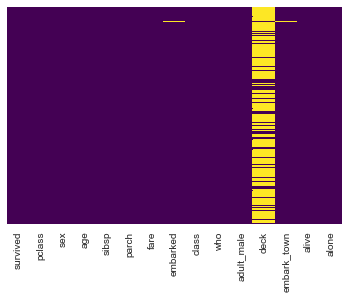

In [27]:
#now all we have to do is dropping the 'deck' feature and the missing value in embarked / embark town
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
titanic.drop('deck',axis=1,inplace=True)

In [29]:
titanic.dropna(inplace=True)

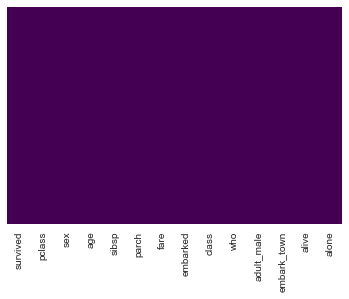

In [30]:
#No more missing values!
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')